In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
dataset = pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [3]:
# Display first 5 rows
dataset.head()

,vin_prefix,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,cafv_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle ID,vehicle_location,electric_utility,2020_census_tract
0,3C3CFFGE1G,Yakima,Yakima,WA,98908.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,14.0,180778377,POINT (-120.60199 46.59817),PACIFICORP,5.307700e+10
1,WP0AB2Y16L,King,Auburn,WA,98092.0,2020,PORSCHE,TAYCAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,203.0,0.0,47.0,277717723,POINT (-122.18497 47.28825),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EB2J,King,Seattle,WA,98109.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,36.0,475865722,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJYGDEF5L,King,Seattle,WA,98125.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,46.0,108837249,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,5YJXCBE22J,Thurston,Olympia,WA,98501.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,22.0,259851259,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10


In [4]:
# Checking information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269673 entries, 0 to 269672
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   vin_prefix             269673 non-null  object 
 1   county                 269662 non-null  object 
 2   city                   269662 non-null  object 
 3   state                  269673 non-null  object 
 4   postal_code            269662 non-null  float64
 5   model_year             269673 non-null  int64  
 6   make                   269673 non-null  object 
 7   model                  269673 non-null  object 
 8   electric_vehicle_type  269673 non-null  object 
 9   cafv_eligibility       269673 non-null  object 
 10  electric_range         269669 non-null  float64
 11  base_msrp              269669 non-null  float64
 12  legislative_district   269009 non-null  float64
 13  dol_vehicle ID         269673 non-null  int64  
 14  vehicle_location       269584 non-nu

In [4]:
dataset.describe()

,postal_code,model_year,electric_range,base_msrp,legislative_district,dol_vehicle ID,2020_census_tract
count,269662.000000,269673.000000,269669.000000,269669.000000,269009.000000,2.696730e+05,2.696620e+05
mean,98174.302260,2021.925832,40.751692,663.101079,28.851436,2.434417e+08,5.297165e+10
std,2590.609215,3.050066,79.604176,6790.627969,14.894449,6.461834e+07,1.632722e+09
min,1030.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2021.000000,0.000000,0.000000,17.000000,2.190569e+08,5.303301e+10
50%,98133.000000,2023.000000,0.000000,0.000000,32.000000,2.610981e+08,5.303303e+10
75%,98382.000000,2024.000000,33.000000,0.000000,42.000000,2.768459e+08,5.305307e+10
max,99577.000000,2026.000000,337.000000,845000.000000,49.000000,4.791150e+08,6.601095e+10


## Data Cleaning

In [5]:
# Checking for missing values
dataset.isnull().sum()

vin_prefix                 0
county                    11
city                      11
state                      0
postal_code               11
model_year                 0
make                       0
model                      0
electric_vehicle_type      0
cafv_eligibility           0
electric_range             4
base_msrp                  4
legislative_district     664
dol_vehicle ID             0
vehicle_location          89
electric_utility          11
2020_census_tract         11
dtype: int64

In [6]:
df_clean = dataset.copy() # copied dataset

In [7]:
# Dropping thevalues for 'county', 'city', 'postal_code'
df_clean = df_clean.dropna(subset=['county', 'city', 'postal_code', 'legislative_district', 'vehicle_location'])
df_clean.head(2)

,vin_prefix,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,cafv_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle ID,vehicle_location,electric_utility,2020_census_tract
0,3C3CFFGE1G,Yakima,Yakima,WA,98908.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,14.0,180778377,POINT (-120.60199 46.59817),PACIFICORP,5.307700e+10
1,WP0AB2Y16L,King,Auburn,WA,98092.0,2020,PORSCHE,TAYCAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,203.0,0.0,47.0,277717723,POINT (-122.18497 47.28825),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [8]:
df_clean.isnull().sum()

vin_prefix               0
county                   0
city                     0
state                    0
postal_code              0
model_year               0
make                     0
model                    0
electric_vehicle_type    0
cafv_eligibility         0
electric_range           4
base_msrp                4
legislative_district     0
dol_vehicle ID           0
vehicle_location         0
electric_utility         0
2020_census_tract        0
dtype: int64

In [9]:
df_clean['electric_range'] = df_clean['electric_range'].fillna(df_clean['electric_range'].median())
df_clean['base_msrp'] = df_clean['base_msrp'].fillna(df_clean['base_msrp'].median())


In [11]:
df_clean.isnull().sum()

vin_prefix               0
county                   0
city                     0
state                    0
postal_code              0
model_year               0
make                     0
model                    0
electric_vehicle_type    0
cafv_eligibility         0
electric_range           0
base_msrp                0
legislative_district     0
dol_vehicle ID           0
vehicle_location         0
electric_utility         0
2020_census_tract        0
dtype: int64

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268931 entries, 0 to 269672
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   vin_prefix             268931 non-null  object 
 1   county                 268931 non-null  object 
 2   city                   268931 non-null  object 
 3   state                  268931 non-null  object 
 4   postal_code            268931 non-null  float64
 5   model_year             268931 non-null  int64  
 6   make                   268931 non-null  object 
 7   model                  268931 non-null  object 
 8   electric_vehicle_type  268931 non-null  object 
 9   cafv_eligibility       268931 non-null  object 
 10  electric_range         268931 non-null  float64
 11  base_msrp              268931 non-null  float64
 12  legislative_district   268931 non-null  float64
 13  dol_vehicle ID         268931 non-null  int64  
 14  vehicle_location       268931 non-null  o

## Changing data types

In [13]:
df_clean['postal_code'] = df_clean['postal_code'].astype(int)                     # Changing postal_code to integer
df_clean['legislative_district'] = df_clean['legislative_district'].astype(int)   # Changing legislative_district to integer
df_clean['2020_census_tract'] = df_clean['2020_census_tract'].astype(int)         # Changing 2020_census_tract to integer

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268931 entries, 0 to 269672
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   vin_prefix             268931 non-null  object 
 1   county                 268931 non-null  object 
 2   city                   268931 non-null  object 
 3   state                  268931 non-null  object 
 4   postal_code            268931 non-null  int64  
 5   model_year             268931 non-null  int64  
 6   make                   268931 non-null  object 
 7   model                  268931 non-null  object 
 8   electric_vehicle_type  268931 non-null  object 
 9   cafv_eligibility       268931 non-null  object 
 10  electric_range         268931 non-null  float64
 11  base_msrp              268931 non-null  float64
 12  legislative_district   268931 non-null  int64  
 13  dol_vehicle ID         268931 non-null  int64  
 14  vehicle_location       268931 non-null  o

In [15]:
df_clean['cafv_eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Eligibility unknown as battery range has not been researched',
       'Not eligible due to low battery range'], dtype=object)

In [16]:
df_clean['cafv_eligibility'] = df_clean['cafv_eligibility'].replace({
        'Clean Alternative Fuel Vehicle Eligible' : 'Eligible',
        'Eligibility unknown as battery range has not been researched' : 'Unknown',
        'Not eligible due to low battery range' : 'Not_Eligible'
})

In [17]:
df_clean.head(2)

,vin_prefix,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,cafv_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle ID,vehicle_location,electric_utility,2020_census_tract
0,3C3CFFGE1G,Yakima,Yakima,WA,98908,2016,FIAT,500,Battery Electric Vehicle (BEV),Eligible,84.0,0.0,14,180778377,POINT (-120.60199 46.59817),PACIFICORP,53077000401
1,WP0AB2Y16L,King,Auburn,WA,98092,2020,PORSCHE,TAYCAN,Battery Electric Vehicle (BEV),Eligible,203.0,0.0,47,277717723,POINT (-122.18497 47.28825),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033029602


In [18]:
df_clean.to_csv("EV_cleaned.csv", index = False)

## EDA

C:\Users\ardy1\AppData\Local\Temp\ipykernel_6296\1442390787.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='electric_vehicle_type', palette='magma')


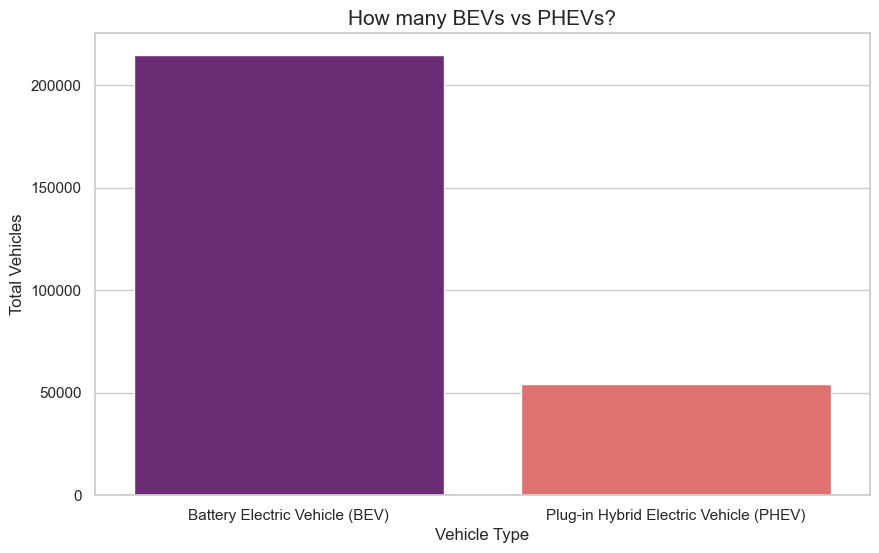

In [19]:
# Battery EV vs Hybrid
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='electric_vehicle_type', palette='magma')
plt.title('How many BEVs vs PHEVs?', fontsize=15)
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Total Vehicles', fontsize=12)

plt.show()

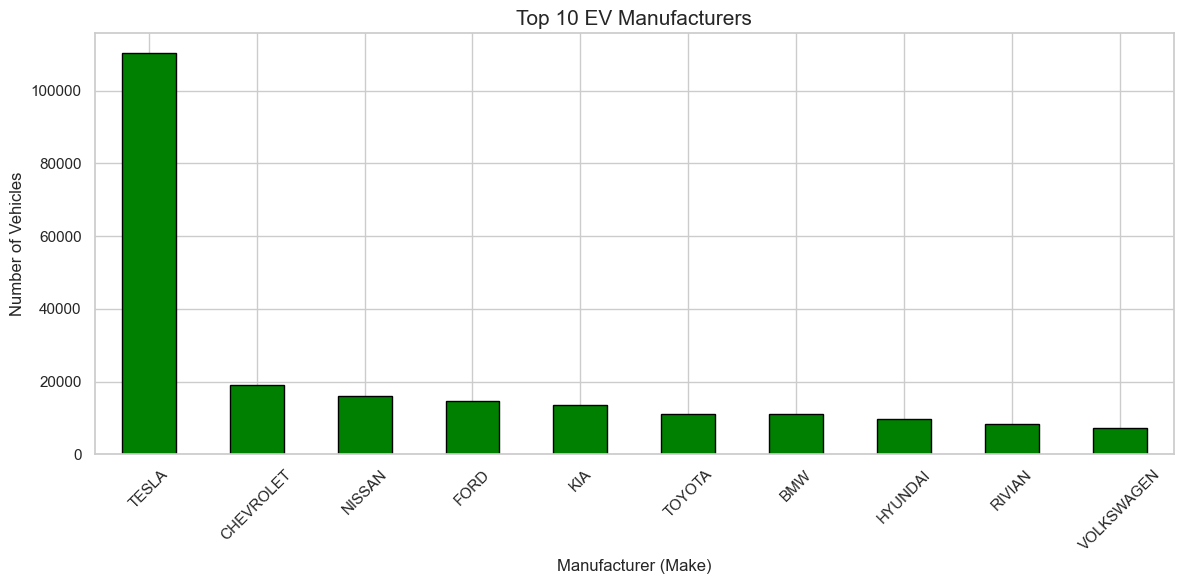

In [20]:
# Top 10 EV Manufacturers
top_10_makes = df_clean['make'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_10_makes.plot(kind='bar', color='green', edgecolor='black')
plt.title('Top 10 EV Manufacturers', fontsize=15)
plt.xlabel('Manufacturer (Make)', fontsize=12)
plt.ylabel('Number of Vehicles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

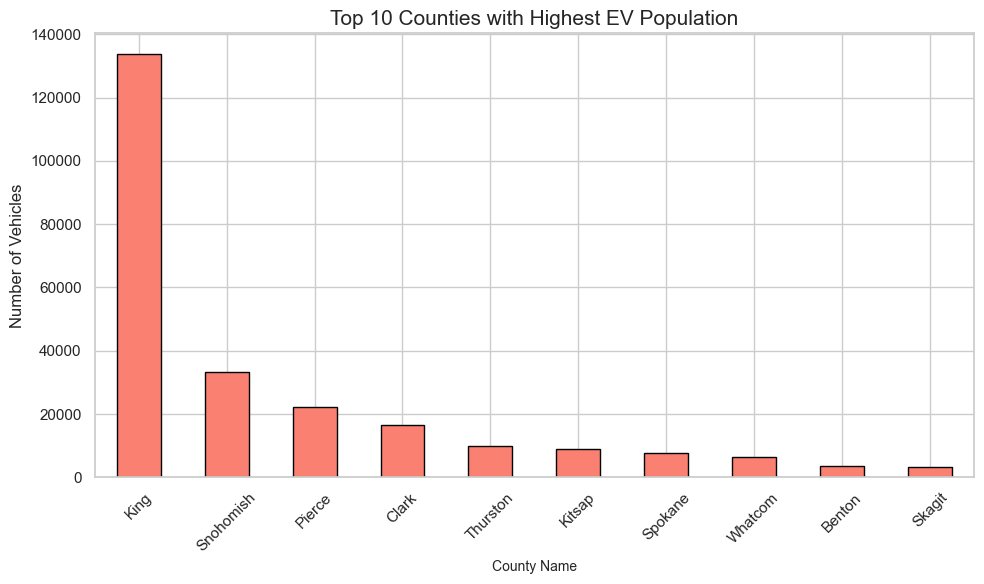

In [21]:
# Top 10 Counties
top_10_counties = df_clean['county'].value_counts().head(10)
plt.figure(figsize = (10,6))
top_10_counties.plot(kind = 'bar', color = 'salmon', edgecolor = 'black')
plt.title('Top 10 Counties with Highest EV Population', fontsize = 15)
plt.xlabel('County Name', fontsize = 10)
plt.ylabel('Number of Vehicles', fontsize = 12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()